## Modelling of the dynamics of bipolar disorder

### *NDC Project Group 3*

_L. L. Longren_

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [2]:
plt.rcParams['font.size'] = 13
cmap = plt.cm.viridis

mania ($M$) and depression ($D$)  
<ul>
<li>$V_M$ and $V_D$ are the maximum rates at which mania and depression build up.
<li>$k_M$ and $k_D$ measure the maximum rates at which $M$ and $D$ disappear.
<li>$K_1$ and $K_2$ denote, respectively, the values of $M$ and $D$ corresponding to the half-maximum rate of their disappearance.
<li>$K_{i1}$ denotes the value of $D$ yielding 50% inhibition of $M$, while $K_{i2}$ represents the value of $M$ yielding 50% inhibition of $D$.

Equations (1):

## <font color='black'> $\frac{dM}{dt} = V_M (\frac{K_{i1}^2}{K_{i1}^2 + D^2}) - k_M (\frac{M}{K_1 + M})$

## <font color='black'> $\frac{dD}{dt} = V_D (\frac{K_{i2}^2}{K_{i2}^2 + M^2}) - k_D (\frac{D}{K_2 + D})$

Equations (2):

## <font color='black'> $\frac{dM}{dt} = V_M (\frac{K_{i1}^2}{K_{i1}^2 + D^2})(\frac{F_D}{K_1+F_D}) - k_M (\frac{M}{K_2 + M})$

## <font color='black'> $\frac{dD}{dt} = V_D (\frac{K_{i2}^2}{K_{i2}^2 + M^2})(\frac{F_M}{K_3+F_M}) - k_D (\frac{D}{K_4 + D})$

## <font color='black'> $\frac{dF_M}{dt} = k_{c1}M - k_{c2}F_M$

## <font color='black'> $\frac{dF_D}{dt} = k_{c3}D - k_{c4}F_D$

Equations (3):

## <font color='black'> $\frac{dM}{dt} = V_M (\frac{K_{i1}^2}{K_{i1}^2 + D^2})(\frac{K_{i3}^n}{K_{i3}^n+F_M^n}) - k_M (\frac{M}{K_2 + M})$

## <font color='black'> $\frac{dD}{dt} = V_D (\frac{K_{i2}^2}{K_{i2}^2 + M^2})(\frac{K_{i4}^n}{K_{i4}^n+F_D^n}) - k_D (\frac{D}{K_4 + D})$

## <font color='black'> $\frac{dF_M}{dt} = k_{c1}M - k_{c2}(\frac{F_M}{K_5+F_M})$

## <font color='black'> $\frac{dF_D}{dt} = k_{c3}D - k_{c4}(\frac{F_D}{K_6+F_D})$

**1. Numerically solve Eq. (1) and reproduce the results of [2], specifically Fig.2 showing the
monostability scenario of the system.**

In [3]:
def equations1(t, y, V_M, K_i1, K_i2, K_1, K_2, k_M, k_D, theta):
    M, D = y
    V_D = theta*V_M
    # define differential equations
    dMdt = V_M*(K_i1**2/(K_i1**2+D**2)) - k_M*(M/(K_1+M))
    dDdt = V_D*(K_i2**2/(K_i2**2+M**2)) - k_D*(D/(K_2+D))
    return [dMdt, dDdt]

(100,) (100,)


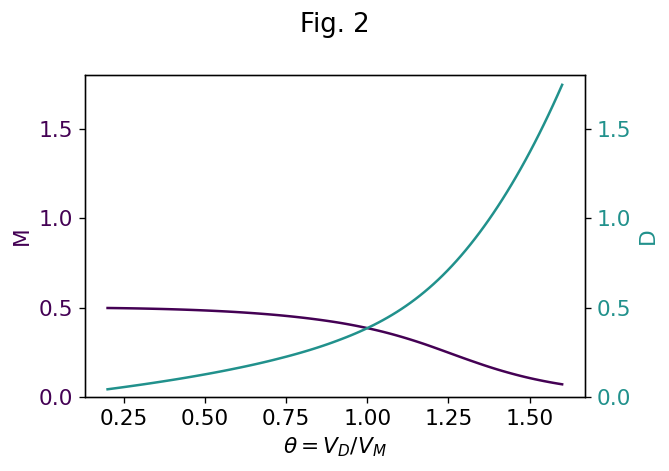

In [9]:
p1 = {
    'V_M': 1,
    'K_i1': 1,
    'K_i2': 1,
    'K_1': 0.5,
    'K_2': 0.5,
    'k_M': 2,
    'k_D': 2,
    'M0': 1,
    'D0': 1
}
num = 100
theta = np.linspace(0.2, 1.6, num)
M = np.zeros(num)
D = np.zeros(num)
for i in range(num):
    out = solve_ivp(fun=equations1, t_span=(0, 10), 
                    y0=[p1['M0'], p1['D0']], 
                    args=(p1['V_M'], p1['K_i1'], p1['K_i2'], p1['K_1'], p1['K_2'], p1['k_M'], p1['k_D'], theta[i]))
    M[i], D[i] = out.y[:,-1]
print(M.shape, D.shape)

fig, ax1 = plt.subplots(dpi=120)
ax2 = ax1.twinx()

color = iter(cmap(np.linspace(0, 0.5, 2)))
color1 = next(color)
ax1.set_xlabel(r'$\theta = V_D / V_M$')
ax1.set_ylabel('M', color=color1)
ax1.plot(theta, M, label='M', color=color1)
ax1.tick_params(axis='y', labelcolor=color1)

color2 = next(color)
ax2.set_ylabel('D', color=color2)
ax2.plot(theta, D, label='D', color=color2)
ax2.tick_params(axis='y', labelcolor=color2)

ax1.set_ylim([0,1.8])
ax2.set_ylim([0,1.8])

plt.suptitle('Fig. 2')
plt.tight_layout()
plt.show()

**2. Reproduce Fig.3 from [2] to show the bistability of system (1).**

(2, 50) (2, 50)


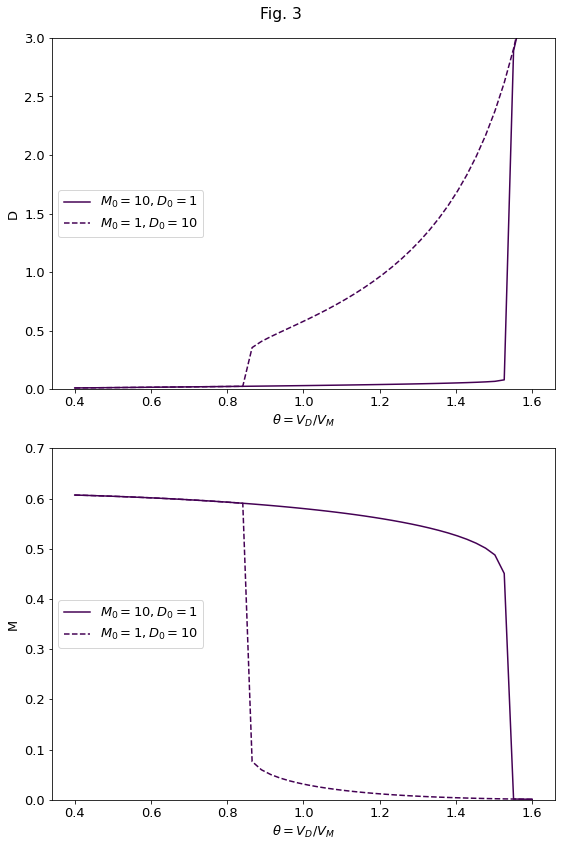

In [5]:
p2 = {
    'V_M': 1.1,
    'K_i1': 0.2,
    'K_i2': 0.2,
    'K_1': 0.5,
    'K_2': 0.5,
    'k_M': 2,
    'k_D': 2,
    'M0': [10,1],
    'D0': [1,10]
}
num = 50
n = len(p2['M0'])
theta = np.linspace(0.4, 1.6, num)
M = np.zeros((n,num))
D = np.zeros((n,num))
for i in range(num):
    for j in range(n):
        out = solve_ivp(fun=equations1, t_span=(0, 100), 
                        y0=[p2['M0'][j], p2['D0'][j]], 
                        args=(p2['V_M'], p2['K_i1'], p2['K_i2'], p2['K_1'], p2['K_2'], p2['k_M'], p2['k_D'], theta[i]))
        M[j][i], D[j][i] = out.y[:,-1]
print(M.shape, D.shape)

fig, axs = plt.subplots(nrows=2, figsize=(8,12))
ls = ['-', '--']

[axs[0].plot(theta, D[i], c=cmap(0), ls=ls[i], 
             label='$M_0={}, D_0={}$'.format(p2['M0'][i],p2['D0'][i])) for i in range(n)]
axs[0].set_ylabel('D')
axs[0].set_xlabel(r'$\theta = V_D / V_M$')

[axs[1].plot(theta, M[i], c=cmap(0), ls=ls[i],
             label='$M_0={}, D_0={}$'.format(p2['M0'][i],p2['D0'][i])) for i in range(n)]
axs[1].set_ylabel('M')
axs[1].set_xlabel(r'$\theta = V_D / V_M$')

axs[0].set_ylim([0,3])
axs[1].set_ylim([0,0.7])
axs[0].legend(loc='center left')
axs[1].legend(loc='center left')

plt.suptitle('Fig. 3')
plt.tight_layout()
plt.show()

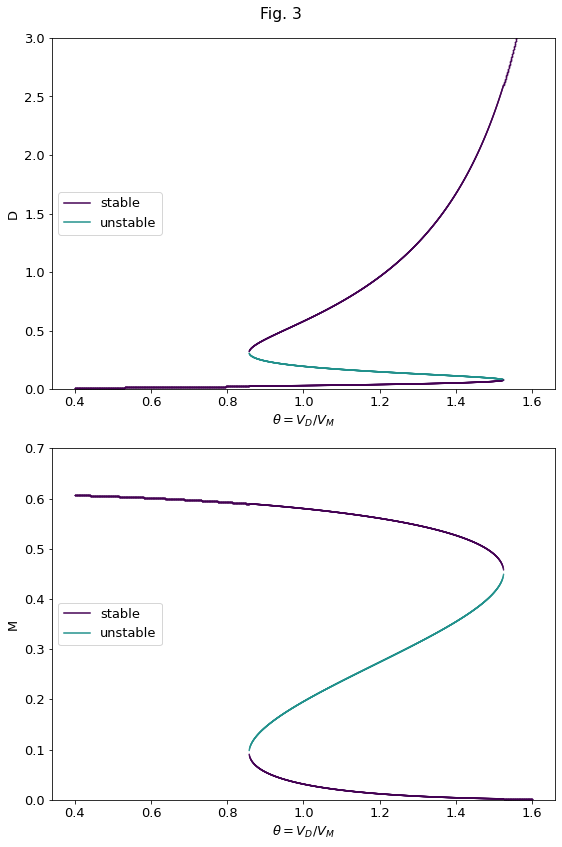

In [30]:
def analytical_M(theta):  # self from scratch
    a, b, c, d, e, f, k_D, k_M = 0.022, 0.08, -0.044, 0.022*theta, 0.08, -0.044*theta, 2, 2
    A = -(b*k_D**2 + c*k_D**2)
    B = a*k_D**2
    C = -(2*b*f*k_D + 2*c*f*k_D + 2*b*k_D*e + 2*c*k_D*e)
    D = 2*a*f*k_D + 2*a*k_D*e
    E = -(2*b*e*f + 2*c*e*f + b*f**2 + c*f**2 + b*e**2 + c*e**2 + k_M*d**2)
    F = 2*a*e*f + a*f**2 + a*e**2
    return np.roots([A, B, C, D, E, F])

def analytical_D(theta):  # self from scratch
    a, b, c, d, e, f, k_D, k_M = 0.022*theta, 0.08, -0.044*theta, 0.022, 0.08, -0.044, 2, 2
    A = -(b*k_D**2 + c*k_D**2)
    B = a*k_D**2
    C = -(2*b*f*k_D + 2*c*f*k_D + 2*b*k_D*e + 2*c*k_D*e)
    D = 2*a*f*k_D + 2*a*k_D*e
    E = -(2*b*e*f + 2*c*e*f + b*f**2 + c*f**2 + b*e**2 + c*e**2 + k_M*d**2)
    F = 2*a*e*f + a*f**2 + a*e**2
    return np.roots([A, B, C, D, E, F])

num = 3000
theta = np.linspace(0.4, 1.6, num)
fig, axs = plt.subplots(nrows=2, figsize=(8,12))
colors = cmap(np.linspace(0, 0.5, 2))
for i in theta:
    values_D = [v.real for v in analytical_D(i) if v.imag == 0]
    values_M = [v.real for v in analytical_M(i) if v.imag == 0]     
    axs[0].scatter(np.full(len(values_D), i), values_D, 
                   c=[colors[j%2] for j in range(len(values_D))], s=0.25)
    axs[1].scatter(np.full(len(values_M), i), values_M, 
                   c=[colors[j%2] for j in range(len(values_M))], s=0.25)
    
axs[0].set_ylabel('D')
axs[1].set_ylabel('M')
axs[0].set_xlabel(r'$\theta = V_D / V_M$')
axs[1].set_xlabel(r'$\theta = V_D / V_M$')
axs[0].set_ylim([0,3])
axs[1].set_ylim([0,0.7])

import matplotlib.lines as mlines
stable_line = mlines.Line2D([], [], color=colors[0], linestyle='-', label='stable')
unstable_line = mlines.Line2D([], [], color=colors[1], linestyle='-', label='unstable')
axs[0].legend(handles=[stable_line, unstable_line], loc='center left')
axs[1].legend(handles=[stable_line, unstable_line], loc='center left')

plt.suptitle('Fig. 3')
plt.tight_layout()
plt.show()

---

In [7]:
# num0 = 60
# theta = 1.3
# M = np.zeros((num0,num0,10))
# D = np.zeros((num0,num0,10))
# dM = np.zeros((num0,num0))
# dD = np.zeros((num0,num0))
# M0 = np.linspace(0, 1, num0)
# D0 = np.linspace(0, 1, num0)
# for j in range(num0**2):
#     out = solve_ivp(fun=equations, t_span=(0, 10), 
#                     y0=[M0[j//num0], D0[j%num0]], 
#                     args=(p2['V_M'], p2['K_i1'], p2['K_i2'], p2['K_1'], p2['K_2'], p2['k_M'], p2['k_D'], theta))
#     M[j//num0,j%num0], D[j//num0,j%num0] = out.y[:,:10]
#     dM[j//num0,j%num0], dD[j//num0,j%num0] = out.y[:,-1] - out.y[:,0]

In [8]:
# maskM = np.where(dM > 0, True, False)
# plt.imshow(maskM)
# plt.colorbar()
# plt.show()

# maskD = np.where(dD > 0, True, False)
# plt.imshow(maskD)
# plt.colorbar()
# plt.show()

In [9]:
# maskM = np.where(dM > 0, True, False)
# temp = abs(np.diff(maskM, append=np.nan)) == 1
# plt.imshow(temp)
# plt.colorbar()
# plt.show()

# maskD = np.where(dD > 0, True, False)
# temp = abs(np.diff(maskD, append=np.nan)) == 1
# plt.imshow(temp)
# plt.colorbar()
# plt.show()

In [10]:
# numS = 25
# num0 = 30
# theta = np.linspace(0.4, 1.6, numS)
# M = np.zeros((num0,num0,numS))
# D = np.zeros((num0,num0,numS))
# dM = np.zeros((num0,num0,numS))
# dD = np.zeros((num0,num0,numS))
# M0 = np.linspace(0, 1, num0)
# D0 = np.linspace(0, 1, num0)
# for i in range(numS):
#     print(i)
#     for j in range(num0**2):
#         out = solve_ivp(fun=equations, t_span=(0, 50), 
#                         y0=[M0[j//num0], D0[j%num0]], 
#                         args=(p2['V_M'], p2['K_i1'], p2['K_i2'], p2['K_1'], p2['K_2'], p2['k_M'], p2['k_D'], theta[i]))
#         M[j//num0,j%num0,i], D[j//num0,j%num0,i] = out.y[:,0]
#         dM[j//num0,j%num0,i], dD[j//num0,j%num0,i] = out.y[:,-1] - out.y[:,0]

In [11]:
# num = 12
# print(np.unique((dD[:,:,num]+D[:,:,num]).round(2)))
# print(np.unique((dM[:,:,num]+M[:,:,num]).round(2)))

In [12]:
# avgM = np.zeros(numS)
# avgD = np.zeros(numS)
# for i in range(numS):
#     maskM = np.where(dM[:,:,i] > 0, True, False)
#     temp = abs(np.diff(maskM, append=np.nan)) == 1
#     avgM[i] = np.nanmean(np.where(temp, M[:,:,i], np.nan))
    
# #     maskD = np.where(dD[:,:,i] > 0, True, False)
# #     temp = abs(np.diff(maskD, append=np.nan)) == 1
# #     avgD[i] = np.nanmean(np.where(temp, D[:,:,i], np.nan))

#     maskD = np.where(dD[:,:,i] > 0, True, False)
#     temp = abs(np.diff(maskD, append=np.nan)) == 1
#     avgD[i] = np.nanmean(np.where(temp, D[:,:,0], np.nan))

In [13]:
# fig, axs = plt.subplots(nrows=2, figsize=(8,12))

# theta2 = np.linspace(0.4, 1.6, numS)

# ls = ['-', '--', '-.']
# # [axs[0].plot(theta, D[i], c='k', ls=ls[i]) for i in range(n)]
# axs[0].set_ylabel('D')
# axs[0].set_xlabel(r'$\theta = V_D / V_M$')
# axs[0].plot(theta2, avgD)

# # [axs[1].plot(theta, M[i], c='k', ls=ls[i]) for i in range(n)]
# axs[1].set_ylabel('M')
# axs[1].set_xlabel(r'$\theta = V_D / V_M$')
# axs[1].plot(theta2, avgM)
# plt.show()

In [14]:
# print(np.unique(M.round(2)))
# print(np.unique(D.round(2)))

# plt.imshow(M)
# plt.colorbar()
# plt.show()
# plt.imshow(D)
# plt.colorbar()
# plt.show()

In [15]:
# mask_M = np.where(abs(np.diff(M, append=np.nan)) > np.mean(M), True, False)
# out_M = np.mean(M[mask_M])

# mask_D = np.where(abs(np.diff(D, append=np.nan)) > np.mean(D), True, False)
# out_D = np.mean(D[mask_D])

# print(out_M.round(2), out_D.round(2))

In [16]:
# numS = 50
# num0 = 50
# theta = np.linspace(0.2, 1.6, numS)
# M = np.zeros((num0**2,numS))
# D = np.zeros((num0**2,numS))
# M0 = np.linspace(0, 3, num0)
# D0 = np.linspace(0, 3, num0)
# for i in range(numS):
#     print(i)
#     for j in range(num0**2):
#         out = solve_ivp(fun=equations, t_span=(0, 50), 
#                         y0=[M0[j//num0], D0[j%num0]], 
#                         args=(p2['V_M'], p2['K_i1'], p2['K_i2'], p2['K_1'], p2['K_2'], p2['k_M'], p2['k_D'], theta[i]))
#         M[j][i], D[j][i] = out.y[:,-1]

In [17]:
# step = [np.where(D[num] > D0[num%num0], True, False) for num in range(num0**2)]
# change_idx = [np.argmax(np.diff(step[num])) for num in range(num0**2)]
# [plt.scatter(change_idx[num], D[num][change_idx[num]], c='k') for num in range(num0**2)]
# plt.show()

# step = [np.where(M[num] > M0[num//num0], True, False) for num in range(num0**2)]
# change_idx = [np.argmax(np.diff(step[num])) for num in range(num0**2)]
# [plt.scatter(change_idx[num], M[num][change_idx[num]], c='k') for num in range(num0**2)]
# plt.show()

In [18]:
# fig, axs = plt.subplots(nrows=2, figsize=(8,12))

# [axs[0].plot(theta, D[i], c='k') for i in range(num0**2)]
# axs[0].set_ylabel('D')
# axs[0].set_xlabel(r'$\theta = V_D / V_M$')

# [axs[1].plot(theta, M[i], c='k') for i in range(num0**2)]
# axs[1].set_ylabel('M')
# axs[1].set_xlabel(r'$\theta = V_D / V_M$')

# step = [np.where(D[num] > D0[num%num0], True, False) for num in range(num0**2)]
# change_idx = [np.argmax(np.diff(step[num])) for num in range(num0**2)]
# [axs[0].scatter(theta[change_idx[num]], D0[change_idx[num]%num0], c='b') for num in range(num0**2)]
# [axs[0].scatter(theta[change_idx[num]], M0[change_idx[num]//num0], c='r') for num in range(num0**2)]

# step = [np.where(M[num] > M0[num//num0], True, False) for num in range(num0**2)]
# change_idx = [np.argmax(np.diff(step[num])) for num in range(num0**2)]
# [axs[1].scatter(theta[change_idx[num]], M0[change_idx[num]//num0], c='b') for num in range(num0**2)]
# [axs[1].scatter(theta[change_idx[num]], D0[change_idx[num]%num0], c='r') for num in range(num0**2)]

# plt.show()

**3. Consider the first mechanism of the oscillation mechanism, based on mutual inhibition with
cross-activation from [2], alter the equations and reproduce Fig.5 from [2].**

In [19]:
def equations2(t, y, V_M, K_i1, K_i2, K_1, K_2, K_3, K_4, k_M, k_D, k_c1, k_c2, k_c3, k_c4, theta):
    M, D, F_M, F_D = y
    V_D = theta*V_M
    # define differential equations
    dMdt = V_M*(K_i1**2/(K_i1**2+D**2))*(F_D/(K_1+F_D)) - k_M*(M/(K_2+M))
    dDdt = V_D*(K_i2**2/(K_i2**2+M**2))*(F_M/(K_3+F_M)) - k_D*(D/(K_4+D))
    dF_Mdt = k_c1*M - k_c2*F_M
    dF_Ddt = k_c3*D - k_c4*F_D
    return [dMdt, dDdt, dF_Mdt, dF_Ddt]

(259,) (4, 259)


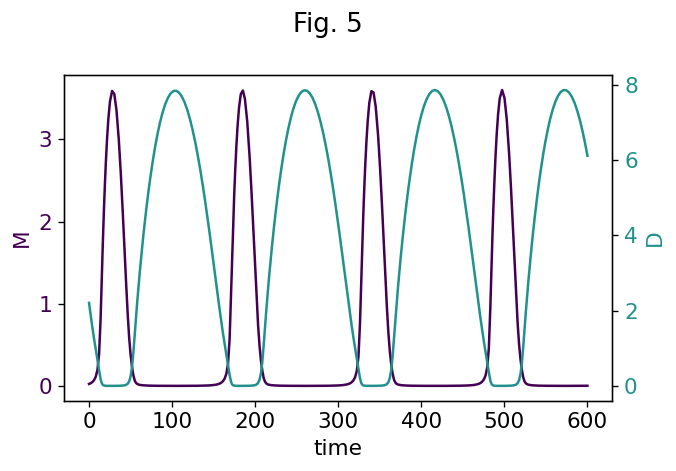

In [20]:
p3 = {
    'V_M': 1,
    'K_i1': 0.4,
    'K_i2': 0.3,
    'K_1': 0.5,
    'K_2': 0.5,
    'K_3': 0.5,
    'K_4': 0.5,
    'k_M': 0.5,
    'k_D': 0.5,
    'k_c1': 0.02,
    'k_c2': 0.02,
    'k_c3': 0.1,
    'k_c4': 0.1,
    'M0': 0.026,
    'D0': 2.21,
    'F_M0': 0.16,
    'F_D0': 3.77
}
num = 100
theta = 1
for i in range(num):
    out = solve_ivp(fun=equations2, t_span=(0, 600), 
                    y0=[p3['M0'], p3['D0'], p3['F_M0'], p3['F_D0']], 
                    args=(p3['V_M'], p3['K_i1'], p3['K_i2'], p3['K_1'], p3['K_2'], p3['K_3'], p3['K_4'], 
                          p3['k_M'], p3['k_D'], p3['k_c1'], p3['k_c2'], p3['k_c3'], p3['k_c4'], theta))
print(out.t.shape, out.y.shape)

fig, ax1 = plt.subplots(dpi=120)
ax2 = ax1.twinx()

color = iter(cmap(np.linspace(0, 0.5, 2)))
color1 = next(color)
ax1.set_xlabel(r'time')
ax1.set_ylabel('M', color=color1)
ax1.plot(out.t, out.y[0], label='M', color=color1)
ax1.tick_params(axis='y', labelcolor=color1)

color2 = next(color)
ax2.set_ylabel('D', color=color2)
ax2.plot(out.t, out.y[1], label='D', color=color2)
ax2.tick_params(axis='y', labelcolor=color2)
plt.suptitle('Fig. 5')
plt.tight_layout()
plt.show()

**4. Now consider the second mechanism of oscillatory behaviour from [2] based on mutual
inhibition with auto-inhibition and reproduce Fig.6.**

In [21]:
def equations3(t, y, V_M, K_i1, K_i2, K_i3, K_i4, K_2, K_4, K_5, K_6, k_M, k_D, k_c1, k_c2, k_c3, k_c4, n, theta):
    M, D, F_M, F_D = y
    V_D = theta*V_M
    # define differential equations
    dMdt = V_M*(K_i1**2/(K_i1**2+D**2))*(K_i3**n/(K_i3**n+F_M**n)) - k_M*(M/(K_2+M))
    dDdt = V_D*(K_i2**2/(K_i2**2+M**2))*(K_i4**n/(K_i4**n+F_D**n)) - k_D*(D/(K_4+D))
    dF_Mdt = k_c1*M - k_c2*(F_M/(K_5+F_M))
    dF_Ddt = k_c3*D - k_c4*(F_D/(K_6+F_D))
    return [dMdt, dDdt, dF_Mdt, dF_Ddt]

(666,) (4, 666)


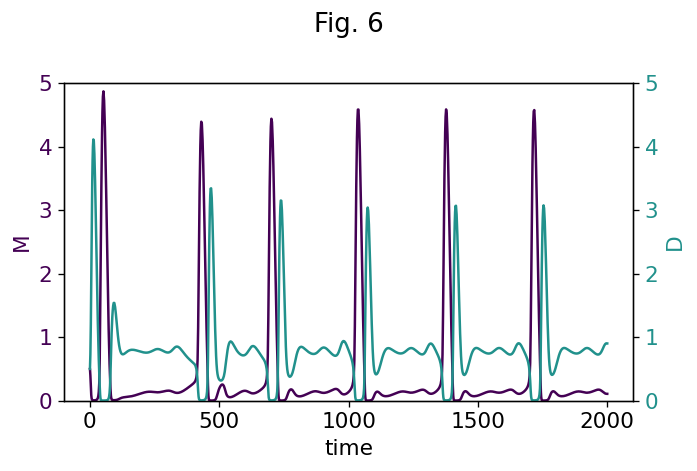

In [22]:
p4 = {
    'V_M': 0.9,
    'K_i1': 0.3,
    'K_i2': 0.4,
    'K_i3': 0.9,
    'K_i4': 0.5,
    'K_2': 0.5,
    'K_4': 0.5,
    'K_5': 0.5,
    'K_6': 0.5,
    'k_M': 0.5,
    'k_D': 0.5,
    'k_c1': 0.02,
    'k_c2': 0.02,
    'k_c3': 0.016,
    'k_c4': 0.022,
    'M0': 0.5,
    'D0': 0.5,
    'F_M0': 0.1,
    'F_D0': 0.1,
    'n': 2
}
theta = 1/p4['V_M']
for i in range(num):
    out = solve_ivp(fun=equations3, t_span=(0, 2000), 
                    y0=[p4['M0'], p4['D0'], p4['F_M0'], p4['F_D0']], 
                    args=(p4['V_M'], p4['K_i1'], p4['K_i2'], p4['K_i3'], p4['K_i4'], p4['K_2'], p4['K_4'], p4['K_5'], p4['K_6'], 
                          p4['k_M'], p4['k_D'], p4['k_c1'], p4['k_c2'], p4['k_c3'], p4['k_c4'], p4['n'], theta))
print(out.t.shape, out.y.shape)

fig, ax1 = plt.subplots(dpi=120)
ax2 = ax1.twinx()

color = iter(cmap(np.linspace(0, 0.5, 2)))
color1 = next(color)
ax1.set_xlabel(r'time')
ax1.set_ylabel('M', color=color1)
ax1.plot(out.t, out.y[0], label='M', color=color1)
ax1.tick_params(axis='y', labelcolor=color1)
ax1.set_ylim([0,5])

color2 = next(color)
ax2.set_ylabel('D', color=color2)
ax2.plot(out.t, out.y[1], label='D', color=color2)
ax2.tick_params(axis='y', labelcolor=color2)
ax2.set_ylim([0,5])
plt.suptitle('Fig. 6')
plt.tight_layout()
plt.show()

**5. Reproduce Fig. 7 & Fig. 8.**

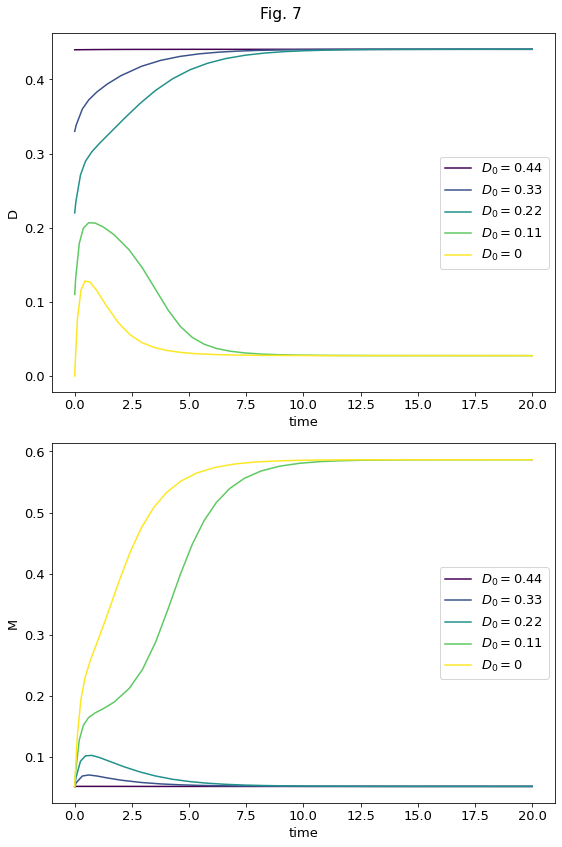

In [23]:
p5 = {
    'V_M': 1.1,
    'K_i1': 0.2,
    'K_i2': 0.2,
    'K_1': 0.5,
    'K_2': 0.5,
    'k_M': 2,
    'k_D': 2,
    'M0': 0.0518,
    'D0': [0.44,0.33,0.22,0.11,0],
    'theta': 0.909
}
fig, axs = plt.subplots(nrows=2, figsize=(8,12))
color = iter(cmap(np.linspace(0, 1, len(p5['D0']))))
for i in range(len(p5['D0'])):
    out = solve_ivp(fun=equations1, t_span=(0, 20), 
                    y0=[p5['M0'], p5['D0'][i]], 
                    args=(p5['V_M'], p5['K_i1'], p5['K_i2'], p5['K_1'], p5['K_2'], p5['k_M'], p5['k_D'], p5['theta']))

    c = next(color)
    axs[0].plot(out.t, out.y[1], c=c, label=r'$D_0={}$'.format(p5['D0'][i]))
    axs[0].set_ylabel('D')
    axs[0].set_xlabel('time')

    axs[1].plot(out.t, out.y[0], c=c, label=r'$D_0={}$'.format(p5['D0'][i]))
    axs[1].set_ylabel('M')
    axs[1].set_xlabel('time')
axs[0].legend()
axs[1].legend()
plt.suptitle('Fig. 7')
plt.tight_layout()
plt.show()

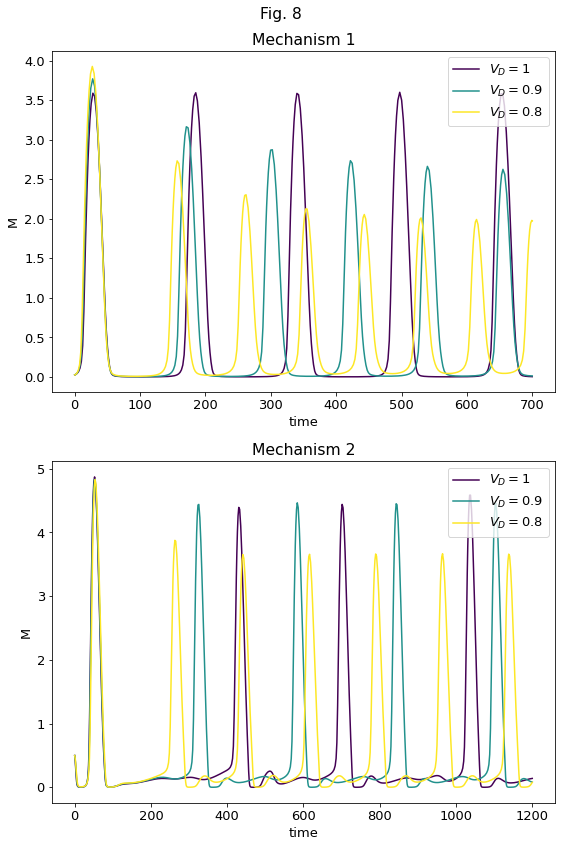

In [24]:
thetaA = [1, 0.9, 0.8]
thetaB = [1/p4['V_M'], 0.9/p4['V_M'], 0.8/p4['V_M']]
VD = [1, 0.9, 0.8]

fig, axs = plt.subplots(nrows=2, figsize=(8,12))
color = iter(cmap(np.linspace(0, 1, len(VD))))
for i in range(len(VD)):
    outA = solve_ivp(fun=equations2, t_span=(0, 700), 
                    y0=[p3['M0'], p3['D0'], p3['F_M0'], p3['F_D0']], 
                    args=(p3['V_M'], p3['K_i1'], p3['K_i2'], p3['K_1'], p3['K_2'], p3['K_3'], p3['K_4'], 
                          p3['k_M'], p3['k_D'], p3['k_c1'], p3['k_c2'], p3['k_c3'], p3['k_c4'], thetaA[i]))

    outB = solve_ivp(fun=equations3, t_span=(0, 1200), 
                    y0=[p4['M0'], p4['D0'], p4['F_M0'], p4['F_D0']], 
                    args=(p4['V_M'], p4['K_i1'], p4['K_i2'], p4['K_i3'], p4['K_i4'], p4['K_2'], p4['K_4'], p4['K_5'], p4['K_6'], 
                          p4['k_M'], p4['k_D'], p4['k_c1'], p4['k_c2'], p4['k_c3'], p4['k_c4'], p4['n'], thetaB[i]))

    c = next(color)
    axs[0].plot(outA.t, outA.y[0], c=c, label=r'$V_D = {}$'.format(VD[i]))
    axs[0].set_ylabel('M')
    axs[0].set_xlabel('time')

    axs[1].plot(outB.t, outB.y[0], c=c, label=r'$V_D = {}$'.format(VD[i]))
    axs[1].set_ylabel('M')
    axs[1].set_xlabel('time')

axs[0].set_title('Mechanism 1')
axs[1].set_title('Mechanism 2')
axs[0].legend()
axs[1].legend()
plt.suptitle('Fig. 8')
plt.tight_layout()
plt.show()

**Extra:**

In [25]:
# theta = 0.5
# p = {
#     'V_M': 1,
#     'K_i1': 1,
#     'K_i2': 1,
#     'K_1': 0.5,
#     'K_2': 0.5,
#     'k_M': 2,
#     'k_D': 2,
#     'M0': 1,
#     'D0': 1
# }
# out = solve_ivp(fun=equations, t_span=(0, 10), 
#                 y0=[p['M0'], p['D0']], 
#                 args=(p['V_M'], p['K_i1'], p['K_i2'], p['K_1'], p['K_2'], p['k_M'], p['k_D'], theta))

# plt.figure(dpi=120)
# [plt.plot(out.t, out.y[i], label=j) for i,j in enumerate(['M','D'])]
# title_str = [value + '=' + str(p[value]) for value in p]
# plt.title(', '.join(title_str) + ', theta=' + str(theta))
# plt.ylabel('M, D')
# plt.xlabel('time')
# plt.legend()
# plt.show()

## <font color='black'> $v = V_{max} \frac{[S]}{K_M + [S]} \rightarrow K_M = V_{max} \frac{[S]}{v} - [S]$ &emsp; *(Michaelis–Menten equation)*
## <font color='black'> $\theta = \frac{[L]^n}{K_d + [L]^n} \rightarrow K_d = \frac{[L]^n}{\theta} - [L]^n$ &emsp; *(Hill–Langmuir equation)*

In [26]:
# def analytical_D(theta):  # leo
#     a, b, c = 0.022, 0.36, 0.08
#     A = 2*a*theta - c
#     B = a*theta
#     C = 4*a*b*theta - 2*b*c
#     D = 2*a*b*theta
#     E = 2*a*b**2*theta - c*b**2 - a**2
#     F = a*b**2*theta
#     return np.roots([A, B, C, D, E, F])

# def analytical_D(theta):  # self
#     a, b, c, d = 0.297, 0.04, -0.022, 0.011
#     A = -(b+c*theta)
#     B = a*theta
#     C = -2*(b**2*d**3+b*c+b*c*theta+c**2*theta)
#     D = 2*(a*b*theta+a*c*theta)
#     E = d**2-b**3-2*b**2*c-b**2*c*theta-2*b*c**2*theta
#     F = a*b**2*theta+2*a*b*c*theta
#     return np.roots([A, B, C, D, E, F])

# theta = np.linspace(0.4, 1.6, 100)
# plt.figure(dpi=120)
# [plt.scatter(np.full(5, i), analytical_D(i).real, c='k', s=0.1) for i in theta]
# # plt.ylim([0,3])
# plt.show()